# Part 1: Symmetric encryption using Advanced-Encryption-Standard (AES)

## <font color='gray'>Python cheatsheet</font>

Values of type `bytes` can be written in ASCII or HEXA.

In [ ]:
print(b"hello" == b"\x68\x65\x6c\x6c\x6f")

Values of type `list` and `bytes` can be concatenated using `+`.

In [ ]:
print([1, 2, 3] + [4, 5] == [1, 2, 3, 4, 5])
print(b"hello" + b" world" == b"hello world")

To access parts of `bytes` or `list` you can use `[start_index:end_index]`.

In [ ]:
print([1, 2, 3, 4, 5][:2] == [1, 2])
print([1, 2, 3, 4, 5][2:] == [3, 4, 5])
print(b"earth"[1:4] == b"art")

To access a `value` in a `dict` use `dictionary["key"]`.

In [ ]:
print({123456: b"hello 987654"}[123456] == b"hello 987654")

## Task 1: <font color='gray'>How _NOT_ to do it</font>

We will start with **a bad implementation** of AES in Python. Your task is to **identify** issues (up to 3) in the following code.

Focus on the following parts:
- Key generation
- Message padding and integrity
- Cipher configuration and proper API usage

**Note down** what you've found.

Useful links:
- [`datetime`](https://docs.python.org/3/library/datetime.html) module and [`ctime()`](https://docs.python.org/3/library/datetime.html#datetime.date.ctime) function documentation
- [`random`](https://docs.python.org/3/library/random.html) module and [`randint()`](https://docs.python.org/3/library/random.html#random.randint) function documentation
- [`cryptography`](https://cryptography.io/en/latest/hazmat/primitives/symmetric-encryption/#module-cryptography.hazmat.primitives.ciphers) module documentation


In [ ]:
import random
from datetime import datetime
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

random.seed(datetime.today().date().ctime())
key = bytes([random.randint(0, 255)] * 16)

message = b"This is the message that we want to encrypt."
padded_message = message + b"\x00" * 20 

cipher = Cipher(algorithms.AES(key=key), mode=modes.ECB())
encryptor = cipher.encryptor()

ciphertext = encryptor.update(padded_message)
ciphertext += encryptor.finalize()

decryptor = cipher.decryptor()
plaintext = decryptor.update(ciphertext)

In [ ]:
import random
from datetime import datetime
from cryptography.hazmat.primitives.ciphers import Cipher, algorithms, modes

# Issue #1: insecure key generation
random.seed(datetime.today().date().ctime())
key = bytes([random.randint(0, 255)] * 16)

# Issue #2: incorrect message padding (makes it ambiguous)
message = b"This is the message that we want to encrypt."
padded_message = message + b"\x00" * 20

# Issue #3: the ECB mode is not secure for longer messages/data
cipher = Cipher(algorithms.AES(key=key), mode=modes.ECB())
encryptor = cipher.encryptor()

# Issue #4: the `encryptor.finalize()` must be called to finish the
# encryption. Similarly, `decryptor.finalize()` must be called.
ciphertext = encryptor.update(padded_message)

decryptor = cipher.decryptor()
plaintext = decryptor.update(ciphertext)

## <font color='blue'>_Checkpoint 1_ <font color='gray'>encryption issues</font>

**DO NOT** continue further in the notebook, wait for the tutor to tell you :-). Don't spoil the seminar for yourself.

## Task 2: <font color='gray'>How to _DO_ it</font>

Now that we know **what and why** was bad in the previous example we
can see how to do it properly

### Issue #1: Key generation
To generate cryptograhically secure and random values we use [`secrets`](https://docs.python.org/3/library/secrets.html) module in Python.

In [ ]:
import secrets

# Generate 16 bytes of cryptographically secure data
example_key = secrets.token_bytes(nbytes=16)
print(example_key.hex())

### Issue #2: Message padding

To properly **pad** and **unpad** a message we need to use the provided [`padding`](https://cryptography.io/en/latest/hazmat/primitives/padding/) API.

In [ ]:
from cryptography.hazmat.primitives import padding

message = b"message"

# Create a padding object and initialize it to block size of 128 bits
padder = padding.PKCS7(128).padder()
padded_data = padder.update(message)
print(f"Message before finalization: {padded_data.hex()}")

# Make sure to finalize the padding!
padded_data += padder.finalize()
print(f"Message after finalization: {padded_data.hex()}")

In [ ]:
# Once decrypted we need to unpad the message
unpadder = padding.PKCS7(128).unpadder()
data = unpadder.update(padded_data) + unpadder.finalize()
print(f"Unpadded message: {data.hex()}")

### Issue #3: Secure mode CBC
The ECB mode is not secure in most cases. We are going to use the CBC mode.<br>
This mode requires an initialization vector (IV). There are 3 important facts about the IV:
1. It must be **random** (similarly to the key),
2. Its size is the same as the block size of the cipher (**128** bits for AES),
3. Ihe IV is transmitted to the receiving party in plaintext, **it is not secret**.

We can send the IV together with the ciphertext by joining them using **+**.

In [ ]:
# Generate the IV the same way as the key
iv = secrets.token_bytes(nbytes=16)

# Initialize the CBC mode with the IV
cbc = modes.CBC(iv)

# Join the IV with the ciphertext
ciphertext = b"\x16k\xa5\xa8S\x9f\x8e\xe5\xf8\xf5r\x85OIUo"
iv_and_ciphertext = iv + ciphertext

# Split the iv + ciphertext
extracted_iv = iv_and_ciphertext[:16]
extracted_ct = iv_and_ciphertext[16:]

print(iv == extracted_iv)
print(ciphertext == extracted_ct)

## Task 3: <font color='gray'>Implement AES encrypt/decrypt functions</font>

Now you have all the building blocks to build correct encryption and decryption functions. Help yourself with the previous examples.

If you need, use the [`cryptography`](https://cryptography.io/en/latest/hazmat/primitives/symmetric-encryption/#module-cryptography.hazmat.primitives.ciphers) documentation.

In [ ]:
def aes_cbc_encrypt(key: bytes, message: bytes) -> bytes:
    # TODO: add PKCS7 padding to the message
    # TODO: generate the initialization vector
    # TODO: initialize the CBC encryption mode
    # TODO: encrypt the message including the finalization of the encryption
    # TODO: prefix the ciphertext with the intialization vector (concatenate iv and ciphertext)
    # TODO: return the ciphertext
    pass

In [ ]:
def aes_cbc_decrypt(key: bytes, ciphertext: bytes) -> bytes:
    # TODO: extract the IV from the ciphertext
    # TODO: initialize the CBC encryption mode
    # TODO: decrypt the ciphertext including the finalization
    # TODO: unpad the padded plaintext to obtain the original msg
    # TODO: return the plaintext
    pass

In [ ]:
# Test that the encryption/decryption works
test_key = secrets.token_bytes(16)
test_message = b"some test message"
test_ciphertext = aes_cbc_encrypt(key=test_key, message=test_message)
test_plaintext = aes_cbc_decrypt(key=test_key, ciphertext=test_ciphertext)
print(test_message == test_plaintext)

In [ ]:
from cryptography.hazmat.primitives.ciphers.modes import CBC
from cryptography.hazmat.primitives import padding
import secrets


def SOLUTION_aes_cbc_encrypt(key: bytes, message: bytes) -> bytes:
    # TODO: add PKCS7 padding to the message
    padder = padding.PKCS7(128).padder()
    padded_msg = padder.update(message) + padder.finalize()
    # TODO: generate the initialization vector
    iv = secrets.token_bytes(16)
    # TODO: initialize the CBC encryption mode
    cipher = Cipher(algorithms.AES(key=key), mode=modes.CBC(iv))
    encryptor = cipher.encryptor()
    # TODO: encrypt the message including the finalization of the encryption
    ciphertext = encryptor.update(padded_msg) + encryptor.finalize()
    # TODO: prefix the ciphertext with the intialization vector
    # TODO: return the ciphertext
    return iv + ciphertext


def SOLUTION_aes_cbc_decrypt(key: bytes, ciphertext: bytes) -> bytes:
    # TODO: extract the IV from the ciphertext
    iv = ciphertext[:16]
    ciphertext = ciphertext[16:]
    # TODO: initialize the CBC encryption mode
    cipher = Cipher(algorithms.AES(key=key), mode=modes.CBC(iv))
    decryptor = cipher.decryptor()
    # TODO: decrypt the ciphertext including the finalization
    padded_plaintext = decryptor.update(ciphertext) + decryptor.finalize()
    # TODO: unpad the padded plaintext to obtain the original msg
    unpadder = padding.PKCS7(128).unpadder()
    plaintext = unpadder.update(padded_plaintext) + unpadder.finalize()
    # TODO: return the plaintext
    return plaintext

## <font color='blue'>_Checkpoint 2_:</font>  <font color='gray'>webserver message API</font>

**DO NOT** continue further in the notebook, wait for the tutor to tell you :-).<br>

Don't spoil the seminar for yourself.

## Task 4: <font color='gray'>Encrypted communication over the "wire"</font>

### 4.1 Key sharing

To share a key we need **a secure channel**. For now we
don't have a better secure channel than to directly **give** the key
to the other party.

Use the paper to write down **your UCO** and **your own key**:
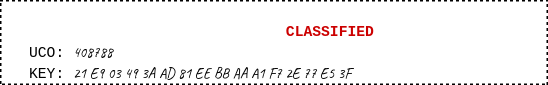

In [ ]:
# Hint: write the key in a hexadecimal format 
example_key = secrets.token_bytes(16)
print(example_key.hex(sep=" "))

In [ ]:
# Hint: Convert the key into bytes from the readable format
print(bytes.fromhex("CE 9C 89 28 27 20 C4 2E 36 2F 20 30 8C 1F F3 F8"))

### 4.2 Communication

We've prepared a simple web server, which you can use to send **a single message.**<br>
Use the following functions to exchange messages. 

```python
send_message(uco_from: int, uco_to: int, message: bytes) -> str
```
```python
recv_message(uco: int) -> Mapping[str, Union[int, bytes]]
```

In [ ]:
from server_communication import send_message, recv_message

You can use `help(<funcion_name>)` to display the documentation.

In [ ]:
help(send_message)
help(recv_message)

Use the previously implemented functions to communicate securely with your classmate:
1. **Generate** a secret key (make sure not to **overwrite it** by executing the cell again).
2. **Write down** the key in hexa on a paper and **exchange it** with a friend.
3. **Encrypt** a message using the preshared key and send it using `send_message`.
4. ..._wait_... for your friend's message and receive it using `recv_message`.
5. **Decrypt** the message using the preshared key.

In [ ]:
# TODO 1. **Generate** a secret key (make sure not to **overwrite it** by executing the cell again).

In [ ]:
# TODO: 2. **Write down** the key in hexa on a paper and **exchange it** with a friend.
# TODO: 3. **Encrypt** a message using the preshared key and send it using `send_message`.
#       4. ..._wait_... for your friend's message and receive it using `recv_message`.
# TODO: 5. **Decrypt** the message using the preshared key.

In [ ]:
key = secrets.token_bytes(16)

In [ ]:
ciphertext = aes_cbc_encrypt(key=key, message=b"my message")
send_message(uco_from=123456, uco_to=987654, content=ciphertext)
# ...wait... for a friend to send a message to you
ciphertext_from_123456 = recv_message(uco=987654)[123456]
plaintext = aes_cbc_decrypt(key=key, ciphertext=ciphertext_from_123456)